## How to generate the data for DB


* **Suppliers** and **Customers** can be generated independently. 
* For *any*/*every* Supplier, some **Products** can be generated (dependence). 
* For *any*/*every* Customer, some **Orders** can be generated (dep.).
* For *any*/*every* Order, some **Order_items** and a **Shipment** can be generated (2 deps.).
    * for every **Order_item**, one existing product have to selected.

In [129]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
random_countries = [
    "Finland", "Sweden", "Norway", "Denmark", "Iceland",
    "Germany", "France", "Italy", "Spain", "Portugal",
    "Netherlands", "Belgium", "Switzerland", "Austria", "Poland",
    "Czech Republic", "Slovakia", "Hungary", "Greece", "Turkey",
    "United Kingdom", "Ireland", "Russia", "Ukraine", "Romania",
    "Bulgaria", "Croatia", "Serbia", "Slovenia", "Lithuania",
    "Latvia", "Estonia", "Belarus", "Moldova", "Albania",
    "North Macedonia", "Bosnia and Herzegovina", "Montenegro", "Kosovo",
    "Cyprus", "Malta", "Luxembourg", "Liechtenstein", "Monaco",
]

get_random_country = lambda: np.random.choice(random_countries)

In [11]:
path = "../data/"
#fname = "products.csv" 
fname = "companies.csv"
#fname = "common-surnames-by-country.csv"
#fname = "common-forenames-by-country.csv"
#fname = "male.txt"
#fname = "female.txt"

In [ ]:
data = pd.read_csv(path + fname)
data.head()

,Company Name,Rating,Review Count,Company Type,Headquarters,Company Age,Number of Employees
0,TCS,3.9,16.1k Reviews,Public,Mumbai + 156 more,52 years old,10000+ employees
1,Accenture,4.0,13.9k Reviews,Private,Dublin + 40 more,31 years old,10000+ employees
2,ICICI Bank,4.1,12.6k Reviews,Public,Mumbai + 42 more,26 years old,10000+ employees
3,Cognizant,3.9,12k Reviews,Private,Teaneck + 39 more,26 years old,10000+ employees
4,HDFC Bank,4.0,10.8k Reviews,Public,Mumbai + 46 more,26 years old,10000+ employees


In [13]:
for column in data.columns: print(column)

Company Name
Rating
Review Count
Company Type
Headquarters
Company Age
Number of Employees


In [30]:
as_product = lambda x: (x["Product Name"], x["Category"], round(x["SellPrice"]*0.0109,2))
as_product(data.iloc[0])

('Cologne Fragrance', 'Fragrance-Women', np.float64(34.01))

In [14]:
data.Country.unique()

array(['AM', 'AZ', 'BD', 'KH', 'CN', 'GE', 'IN', 'IL', 'JP', 'KZ', 'KR',
       'NP', 'PH', 'RU', 'LK', 'TR', 'VN', 'TW', 'AL', 'AT', 'BY', 'BE',
       'BA', 'BG', 'HR', 'CZ', 'DK', 'FO', 'EE', 'FI', 'FR', 'DE', 'GR',
       'HU', 'IS', 'IE', 'IT', 'XK', 'LV', 'LT', 'LU', 'MT', 'MD', 'ME',
       'NL', 'MK', 'NO', 'PL', 'PT', 'RO', 'RS', 'SK', 'SI', 'ES', 'SV',
       'CH', 'UA', 'GB', 'CA', 'CR', 'CU', 'DO', 'GT', 'MX', 'US', 'AU',
       'FJ', 'NZ', 'AR', 'BR', 'CL', 'CO', 'PY', 'PE', 'SR'], dtype=object)

In [14]:
locations = [item.split()[0] for item in data.Headquarters.unique()]
locations

['Mumbai',
 'Dublin',
 'Mumbai',
 'Teaneck',
 'Mumbai',
 'Bangalore',
 'Mumbai',
 'Paris',
 'Pune',
 'Noida',
 'New',
 'Navi',
 'New',
 'Bangalore',
 'New',
 'Berkshire',
 'Ahmedabad',
 'New',
 'Mumbai',
 'Washington',
 'Bangalore',
 'Mumbai',
 'Seoul',
 'New',
 'Stockholm',
 'New',
 'Mumbai',
 'Mumbai',
 'Paris',
 'Mumbai',
 'Mumbai',
 'London',
 'Navi',
 'Hyderabad',
 'Pittsford',
 'Tysons',
 'California',
 'Mumbai',
 'Gurugram',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Mumbai',
 'Bengaluru',
 'Shenzhen',
 'London',
 'Noida',
 'London',
 'Espoo',
 'New',
 'Bengaluru',
 'Chennai',
 'Seoul',
 'Dongguan',
 'Ahmedabad,',
 'Kolkata',
 'Chennai',
 'Kochi',
 'Tokyo,',
 'Ann',
 'Mumbai',
 'Sttugart',
 'Hosur',
 'Bengaluru',
 'Minnesota',
 'New',
 'Bangalore',
 'Gurugram',
 'Mumbai',
 'Hyderabad',
 'New',
 'Kolkata',
 'Hyderabad',
 'California',
 'Canonsburg,Pennsylvania',
 'Troy',
 'Gurugram',
 'Florida',
 'New',
 'Noida',
 'New',
 'Mumbai',
 'Ahmedabad',
 'Texas',
 'Thrissur',
 'Gurgaon',
 'I

In [77]:
def generate_dates(start, delta, freq='D', n=3):
    """
    Generate a list of n random dates within a specified range.
    
    Parameters:
    - start (datetime): The starting date.
    - delta (timedelta): The time delta to define the end date.
    - freq (str): Frequency string for date range generation (default is 'D' for
        daily).
    - n (int): Number of random dates to generate (default is 3).
    
    Returns:
    - tuple: A tuple containing two lists:
        - List of datetime objects.
        - List of date strings in 'YYYY-MM-DD' format.
    
    """
    end = pd.to_datetime(start+delta).date()
    seed = pd.date_range(start=start, end=end, freq=freq)
    dates = np.random.choice(seed, size=n, replace=False)
    dates = sorted(dates)
    py_dates = [pd.Timestamp(date).to_pydatetime() for date in dates]
    return py_dates, [str(date).split("T")[0] for date in dates]

def sample_quantity(p: float = 0.7, max_qty: int | None = None) -> int:
    """
    Return a discrete quantity with mode at 1 using a geometric distribution.
    - p: success probability (higher p => more 1s, lower mean)
    - max_qty: optional upper cap for quantities (e.g., stock or policy)
    """
    q = int(np.random.geometric(p))  # support: 1, 2, ...; P(1)=p; E[q]=1/p
    if max_qty is not None:
        q = min(q, int(max_qty))
    return q

In [83]:
generate_dates(datetime(2020, 1, 1), delta=timedelta(weeks=1))

([datetime.datetime(2020, 1, 2, 0, 0),
  datetime.datetime(2020, 1, 3, 0, 0),
  datetime.datetime(2020, 1, 6, 0, 0)],
 ['2020-01-02', '2020-01-03', '2020-01-06'])

In [65]:
datetime(2020, 1, 1) + timedelta(days=7)

datetime.datetime(2020, 1, 8, 0, 0)

### Suppliers:
```
CREATE TABLE Suppliers (
    supplier_id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    contact_info VARCHAR(255),
    country VARCHAR(100)
);
```

**id**: 1-100
**name**: Combining from **forenames/surnames**
**contact_info**: Leave to null
**country**: From random_countries

### Customers

```
CREATE TABLE Customers (
    customer_id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    location VARCHAR(255),
    email VARCHAR(255) UNIQUE NOT NULL
);
```
**customer_id**: 1-100
**name**: Combining from **forenames/surnames**
**localtion**: From locations
**email**: first.lastname@randomprovider.random_domain

### Products

```
CREATE TABLE Products (
    product_id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    category VARCHAR(100),
    price DECIMAL(10, 2) NOT NULL,
    supplier_id INT REFERENCES Suppliers(supplier_id),
    stock_quantity INT NOT NULL
);
```

* for each **supplier_id** in [1,100]:
    * **name**: Products.name
    * **category**: Products.category
    * **price**: factor*Product.SellPrice
    * **supplier_id**: ...
    * **stock_quamtity**: random.randomint(0,1e4) # note special case if 0

In [36]:
path = "../data/"
fname = "product_data.csv" 
data = pd.read_csv(path + fname)
data.tail()

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currancy,MRP,SellPrice,Discount,Category
4561,4562,crimsoune club,CRIMSOUNE CLUB6,CRIMSOUNE CLUB6 - Westernwear-Women,solid hood poly cotton womens sweatshirt - yellow,"Size:Large,Medium,Small,X-Large",Rs.,1699,849,50% off,Westernwear-Women
4562,4563,crimsoune club,CRIMSOUNE CLUB7,CRIMSOUNE CLUB7 - Westernwear-Women,striped v-neck cotton womens casual shirt - white,"Size:Large,Medium,X-Large,XX-Large,XXX-Large",Rs.,1299,1039,20% off,Westernwear-Women
4563,4564,crimsoune club,CRIMSOUNE CLUB8,CRIMSOUNE CLUB8 - Westernwear-Women,womens slim fit solid shirt - red,"Size:Large,Medium,X-Large",Rs.,1299,649,50% off,Westernwear-Women
4564,4565,crimsoune club,CRIMSOUNE CLUB9,CRIMSOUNE CLUB9 - Westernwear-Women,printed lyocell round neck womens top - green,"Size:Large,Medium,Small,X-Large,XX-Large,XXX-L...",Rs.,1399,979,30% off,Westernwear-Women
4565,4566,crimsoune club,CRIMSOUNE CLUB10,CRIMSOUNE CLUB10 - Westernwear-Women,womens grey solid jumpsuit - denim,"Size:Large,Medium,X-Large,XX-Large",Rs.,2499,1249,50% off,Westernwear-Women


In [162]:
as_product = lambda x: (x["Product Name"], x["Category"], float(round(x["SellPrice"]*0.0109,2)), np.random.randint(1,101), 1000*sample_quantity(0.6, max_qty=20) + np.random.randint(-500,500))
rand_inds = np.random.choice(data.shape[0], size=5, replace=False)
[as_product(data.iloc[i]) for i in rand_inds]

[('AND115 - Westernwear-Women', 'Westernwear-Women', 32.25, 12, 1824),
 ('BIBA14 - Indianwear-Women', 'Indianwear-Women', 14.16, 52, 1419),
 ('CASIO182 - Watches-Women', 'Watches-Women', 68.63, 52, 2238),
 ('AYESHA39 - Indianwear-Women', 'Indianwear-Women', 15.24, 83, 1929),
 ('AMUKTI83 - Indianwear-Women', 'Indianwear-Women', 10.89, 36, 3427)]

In [163]:
n_products = 100
products_df = pd.DataFrame(
    [as_product(data.iloc[i]) for i in np.random.choice(data.shape[0], size=n_products, replace=False)],
    columns=["name", "category", "price", "supplier_id", "stock_quantity"]
)
products_df["product_id"] = np.arange(1, n_products+1)
products_df = products_df[["product_id", "name", "category", "price", "supplier_id", "stock_quantity"]]
products_df.head()

,product_id,name,category,price,supplier_id,stock_quantity
0,1,ANTONIO BANDERAS1 - Fragrance-Women,Fragrance-Women,2.72,30,2446
1,2,BIBA24 - Indianwear-Women,Indianwear-Women,15.03,83,2008
2,3,BIBA140 - Indianwear-Women,Indianwear-Women,30.51,75,1462
3,4,AND117 - Westernwear-Women,Westernwear-Women,27.02,6,1505
4,5,CLOVIA64 - Lingerie&Nightwear-Women,Lingerie&Nightwear-Women,5.22,56,6283


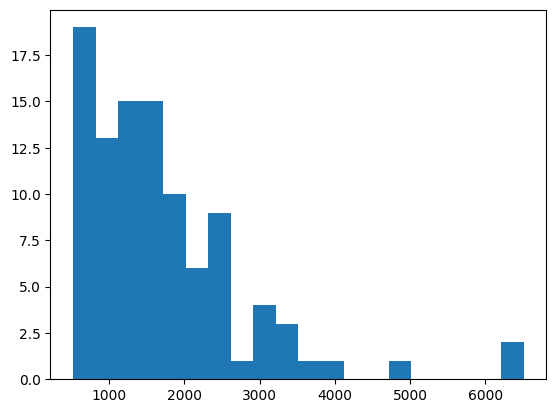

In [164]:
plt.hist(products_df.stock_quantity, bins=20);plt.show()

In [72]:
products_df.category.value_counts()

category
Westernwear-Women           38
Indianwear-Women            22
Footwear-Women              14
Jewellery-Women             10
Lingerie&Nightwear-Women     7
Watches-Women                6
Fragrance-Women              3
Name: count, dtype: int64

### Orders

```
CREATE TABLE Orders (
    order_id SERIAL PRIMARY KEY,
    customer_id INT REFERENCES Customers(customer_id),
    order_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    order_status VARCHAR(50) NOT NULL
);
```

* for each **customer_id** in [1,100]:
    * **customer_id**: ...
    * **order_date**: min_date of 3
    * **order_status**: random.choice of pending/delivered/cancelled

In [105]:
n_orders = 100
order_id = np.arange(1, n_orders+1)
customer_id = np.arange(1, 101)
get_date = lambda minimum_date, k: generate_dates(minimum_date, delta=timedelta(days=3*365), n=1)[k][0]
get_status = lambda: np.random.choice(["Pending", "Shipped", "Delivered", "Cancelled"], p=[0.2, 0.5, 0.25, 0.05])

In [ ]:
orders_df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": np.random.choice(customer_id, size=n_orders, replace=True), # many orders to one customer
    "order_date": [get_date(datetime(2023,1,1), 0) for _ in range(n_orders)],
    "status": [get_status() for _ in range(n_orders)]
})
orders_df.head()

,order_id,customer_id,order_date,status
0,1,41,2025-02-15,Delivered
1,2,29,2023-06-06,Shipped
2,3,12,2025-04-02,Shipped
3,4,23,2024-02-04,Pending
4,5,32,2023-02-17,Pending



### Order_items

```
CREATE TABLE Order_Items (
    order_item_id SERIAL PRIMARY KEY,
    order_id INT REFERENCES Orders(order_id),
    product_id INT REFERENCES Products(product_id),
    quantity INT NOT NULL,
    price_at_purchase DECIMAL(10, 2) NOT NULL
);
```

* for each **order_id** in [1,100]:
    * **product_id**: random.choice(0,100)
    * **quantity**: random
    * **price_at_purchase**: Products.Price where product_id


In [ ]:
n_order_items = 300
order_items_id = np.arange(1, n_order_items+1)
order_id = np.random.choice(orders_df.order_id, size=n_order_items, replace=True)  # many items to one order 
product_id = np.random.choice(products_df.product_id, size=n_order_items, replace=True)  # many items to one product
quantity = [sample_quantity(p=0.7, max_qty=20) for _ in range(n_order_items)]
order_items_df = pd.DataFrame({
    "order_items_id": order_items_id,
    "order_id": order_id,
    "product_id": product_id,
    "quantity": quantity
})
order_items_df.head()

,order_items_id,order_id,product_id,quantity
0,1,57,18,1
1,2,10,11,1
2,3,31,43,2
3,4,68,74,3
4,5,92,55,2


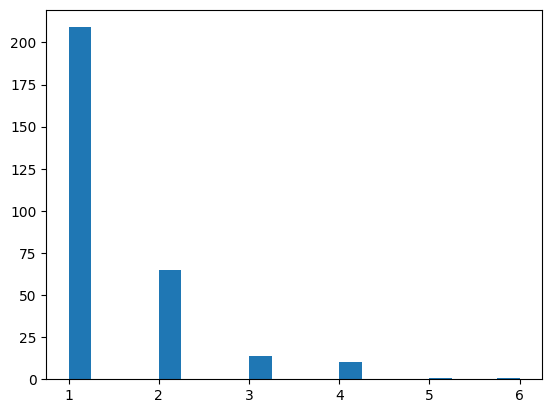

In [182]:
# plot quantity distribution
plt.hist(order_items_df.quantity, bins=20);plt.show()

### Shipments

```
CREATE TABLE Shipments (
    shipment_id SERIAL PRIMARY KEY,
    order_id INT REFERENCES Orders(order_id),
    shipped_date TIMESTAMP,
    delivery_date TIMESTAMP,
    shipping_cost DECIMAL(10, 2) NOT NULL
);
```

* for each **order_id** in [1,100]:
    * **order_id**: ...
    * **shipped_date** < **delivery_date** : random.choice(date_range(start=order_id.order_date,end=+week))
    * **delivery_date**: 
    * **shipping_cost**: (random.randn * factor + shift) * order_item.quantity

In [144]:
n_shipments = n_orders
shipment_id = np.arange(1, n_shipments+1)
order_id = orders_df.order_id.copy()  # one to one with orders
# shipped_date must be after order_date
shipped_date = [
    generate_dates(pd.to_datetime(orders_df.loc[orders_df.order_id == oid, "order_date"].values[0]), delta=timedelta(days=7), n=1)[0][0]
    for oid in order_id
]
delivery_date = [
    generate_dates(shipped_date[i], delta=timedelta(days=14), n=1)[0][0]
    for i in range(n_shipments)
]
if not np.where(shipped_date<delivery_date, True, False).all():
    raise ValueError("Some shipped_date is not before delivery_date")

shipments_df = pd.DataFrame({
    "shipment_id": shipment_id,
    "order_id": order_id,
    "shipped_date": shipped_date,
    "delivery_date": delivery_date
})

# shipping_cost based on quantity of items in the order so we need to get the order_items_df to calculate it
#shipping_cost = []
#for oid in order_id:
#    total_quantity = order_items_df.loc[order_items_df.order_id == oid, "quantity"].sum()
#    cost = 5.0 + 0.5 * total_quantity  # base cost + per item cost
#    shipping_cost.append(round(cost, 2))

# Items per order (sum quantities across order_items)
qty_per_order = order_items_df.groupby("order_id")["quantity"].sum()
items_per_order = np.array([qty_per_order.get(oid, 0) for oid in order_id])

# Gamma model: positive, right-skewed, mean tied to items
base = 4.0       # base handling
per_item = 1.2   # variable per item
k = 6.0          # gamma shape; higher -> lower variance
mu = base + per_item * items_per_order
theta = mu / k
shipping_cost = np.random.gamma(shape=k, scale=theta, size=n_shipments)

# Optional alternative (lognormal multiplicative noise):
# sigma = 0.35
# shipping_cost = (base + per_item * items_per_order) * np.random.lognormal(mean=0.0, sigma=sigma, size=n_shipments)

min_cost = 3.0
shipments_df["shipping_cost"] = np.round(np.maximum(shipping_cost, min_cost), 2)
    

shipments_df.head()

,shipment_id,order_id,shipped_date,delivery_date,shipping_cost
0,1,1,2025-02-17,2025-03-02,11.16
1,2,2,2023-06-11,2023-06-25,5.16
2,3,3,2025-04-07,2025-04-17,7.84
3,4,4,2024-02-11,2024-02-13,12.05
4,5,5,2023-02-24,2023-02-28,7.17


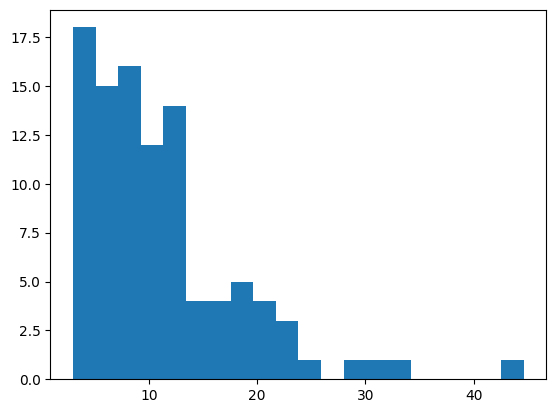

In [145]:
plt.hist(shipments_df.shipping_cost, bins=20);plt.show()

In [183]:
outpath = "../data/"
products_df.to_csv(outpath + "products_generated.csv", index=False)
orders_df.to_csv(outpath + "orders_generated.csv", index=False)
order_items_df.to_csv(outpath + "order_items_generated.csv", index=False)
shipments_df.to_csv(outpath + "shipments_generated.csv", index=False)